In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [38]:
credit_card = pd.read_csv('creditcard.csv')
credit_card['scaled_amount'] = StandardScaler().fit_transform(credit_card['Amount']
                                                           .values.reshape(-1, 1))
credit_card['scaled_time'] = StandardScaler().fit_transform(credit_card['Time']
                                                           .values.reshape(-1, 1))
credit_card.drop(['Time', 'Amount'], axis=1, inplace=True)

In [35]:
scaled_amount = credit_card['scaled_amount']
scaled_time = credit_card['scaled_time']

credit_card.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
credit_card.insert(0, 'scaled_amount', scaled_amount)
credit_card.insert(1, 'scaled_time', scaled_time)
credit_card.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [88]:
X = credit_card.loc[:, credit_card.columns != 'Class']
y = credit_card.loc[:, credit_card.columns == 'Class']

In [89]:
credit_card = credit_card.sample(frac=1)

fraud_df = credit_card.loc[credit_card['Class'] == 1]
non_fraud_df = credit_card.loc[credit_card['Class'] == 0][:492]
normal_df = pd.concat([fraud_df, non_fraud_df])

sampled_df = normal_df.sample(frac=1, random_state=42)
sampled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
95860,1.124107,-0.712002,1.375300,0.691164,-1.408258,0.535892,-1.180127,0.395659,-0.376832,0.804168,...,-0.367993,0.116603,0.155041,0.132418,-0.390634,0.101162,0.032889,0,-0.243282,-0.617289
143334,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,-8.409665,...,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,1,-0.353229,-0.200658
133442,0.740984,-1.159582,-0.153618,0.882426,-0.814985,-0.248992,0.170795,-0.153598,-0.943552,0.641801,...,-0.603959,-0.286118,0.057442,0.527710,-0.259060,-0.007785,0.064953,0,0.834042,-0.303737
77099,-0.075483,1.812355,-2.566981,4.127549,-1.628532,-0.805895,-3.390135,1.019353,-2.451251,-3.555835,...,0.270471,-0.143624,0.013566,0.634203,0.213693,0.773625,0.387434,1,-0.333239,-0.798661
152295,-17.537592,12.352519,-20.134613,11.122771,-14.571080,-0.381622,-23.928661,-4.724921,-8.603038,-15.231833,...,2.389041,2.019128,0.627192,-1.085997,-0.071803,-3.838198,-0.802564,1,-0.313968,0.050984


In [95]:
X_undersample = sampled_df.loc[:, sampled_df.columns != 'Class']
y_undersample = sampled_df.loc[:, sampled_df.columns == 'Class']

In [94]:
print(sampled_df['Class'].value_counts()/len(sampled_df))
print('Total in resampled data: ', len(sampled_df))

1    0.5
0    0.5
Name: Class, dtype: float64
Total in resampled data:  984


In [97]:
from sklearn.cross_validation import train_test_split

# Whole data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled Data
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_undersample,
                                                                               y_undersample,
                                                                               test_size = 0.3,
                                                                               random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_sample))
print("Number transactions test dataset: ", len(X_test_sample))
print("Total number of transactions: ", len(X_train_sample)+len(X_test_sample))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


In [117]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_sample, y_train_sample.values.ravel())
y_pred_sample = lr.predict(X_test_sample.values)

cnf_matrix = confusion_matrix(y_test_sample, y_pred_sample)

print('Recall Metric in the Testing dataset: ', cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(cnf_matrix)
print('Score: {}%'.format(lr.score(X,y)*100))

Recall Metric in the Testing dataset:  0.9148936170212766
[[125  30]
 [ 12 129]]
Score: 85.34340799207885%


In [116]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_sample, y_train_sample.values.ravel())
y_pred = lr.predict(X_test.values)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Recall Metric in the Testing dataset: ', cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(cnf_matrix)
print('Score: {}%'.format(lr.score(X,y)*100))

Recall Metric in the Testing dataset:  0.9281045751633987
[[72821 12469]
 [   11   142]]
Score: 85.33006562338706%


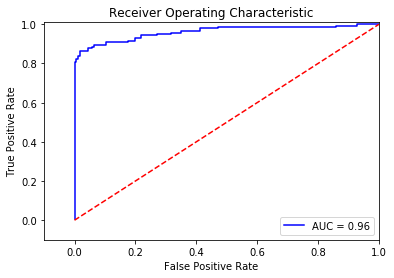

In [120]:
from sklearn.metrics import roc_curve, auc
# ROC CURVE
lr = LogisticRegression(C = 0.01, penalty = 'l1')
y_pred_sample_score = lr.fit(X_train_sample,y_train_sample.values.ravel()).decision_function(X_test_sample.values)

fpr, tpr, thresholds = roc_curve(y_test_sample.values.ravel(),y_pred_sample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [122]:
# For fun, testing on skewed data
lr = LogisticRegression(C = 10, penalty = 'l1')
lr.fit(X_train, y_train.values.ravel())
y_pred = lr.predict(X_test.values)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Recall Metric in the Testing dataset: ', cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(cnf_matrix)
print('Score: {}%'.format(lr.score(X,y)*100))

Recall Metric in the Testing dataset:  0.6143790849673203
[[85276    14]
 [   59    94]]
Score: 99.9213502477116%
